In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dados_wdi = pd.read_excel('(2.2) WDI World Bank.xlsx', na_values='..')
dados_grupo = pd.read_excel('(2.3) WDI Income Group.xlsx')
dados_paises = pd.read_excel('(2.4) WDI Country.xlsx')

In [3]:
dados_wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383577 entries, 0 to 383576
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country Name   383574 non-null  object 
 1   Country Code   383572 non-null  object 
 2   Series Name    383572 non-null  object 
 3   Series Code    383572 non-null  object 
 4   2021 [YR2021]  108687 non-null  float64
 5   Topic          383572 non-null  object 
dtypes: float64(1), object(5)
memory usage: 17.6+ MB


In [4]:
dados_wdi['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

In [5]:
dados_wdi['Series Name'].unique()

array(['Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       ..., "Women's share of population ages 15+ living with HIV (%)",
       'Young people (ages 15-24) newly infected with HIV', nan],
      shape=(1443,), dtype=object)

In [6]:
dados_wdi['Topic'].unique()

array(['Environment: Energy production & use', 'Financial Sector: Access',
       'Social Protection & Labor: Performance',
       'Education: Participation',
       'Economic Policy & Debt: National accounts: Adjusted savings & income',
       'Health: Reproductive health', 'Health: Risk factors',
       'Health: Population: Dynamics', 'Environment: Land use',
       'Environment: Agricultural production', 'Environment: Emissions',
       'Private Sector & Trade: Exports',
       'Private Sector & Trade: Imports',
       'Economic Policy & Debt: National accounts: Shares of GDP & other',
       'Economic Policy & Debt: National accounts: Growth rates',
       'Economic Policy & Debt: National accounts: US$ at constant 2015 prices: Value added',
       'Economic Policy & Debt: National accounts: Local currency at constant prices: Value added',
       'Economic Policy & Debt: National accounts: Local currency at current prices: Value added',
       'Economic Policy & Debt: National acco

In [7]:
dados_wdi.rename(columns={'Country Name':'pais',
                          'Country Code':'cod_pais',
                          'Series Name':'serie',
                          'Series Code':'cod_serie',
                          '2021 [YR2021]':'ano_2021',
                          'Topic':'topico'}, inplace=True)

In [8]:
dados_wdi['pais'].tail(n=20)

383557                                               World
383558                                               World
383559                                               World
383560                                               World
383561                                               World
383562                                               World
383563                                               World
383564                                               World
383565                                               World
383566                                               World
383567                                               World
383568                                               World
383569                                               World
383570                                               World
383571                                               World
383572                                                 NaN
383573                                                 N

In [9]:
dados_wdi = dados_wdi.iloc[0:383572,]

In [10]:
dados_wdi['pais'].tail(n=20)

383552    World
383553    World
383554    World
383555    World
383556    World
383557    World
383558    World
383559    World
383560    World
383561    World
383562    World
383563    World
383564    World
383565    World
383566    World
383567    World
383568    World
383569    World
383570    World
383571    World
Name: pais, dtype: object

In [11]:
dados_saude = dados_wdi[dados_wdi['topico'].str.startswith('Health')]

In [12]:
dados_saude = pd.pivot(dados_saude,
                       index=['pais', 'cod_pais'],
                       columns=['serie'],
                       values='ano_2021')

In [13]:
dados_saude.reset_index(inplace=True)

In [14]:
dados_paises.rename(columns={'Country':'cod_pais'}, inplace=True)

In [15]:
dados_saude = pd.merge(dados_saude, 
                       dados_paises, 
                       on='cod_pais', 
                       how='left')

In [16]:
dados_saude = dados_saude[~ dados_saude['Name'].isna()].reset_index(drop=True)

In [17]:
dados_saude.drop(columns=['Name'], inplace=True)

In [18]:
dados_saude.dropna(axis=1, how='all', inplace=True)

In [19]:
dados_grupo_select = dados_grupo[['Code', 'Income Group']].copy()

In [20]:
dados_grupo_select.rename(columns={'Code':'cod_pais'}, 
                          inplace=True)

In [21]:
dados_saude = pd.merge(dados_saude, dados_grupo_select, 
                       how='left', 
                       on='cod_pais')

In [22]:
organizar = dados_saude.pop('Income Group')

In [23]:
dados_saude.insert(2, 'Group', organizar)

In [24]:
col_pos = dados_saude.columns

In [25]:
dados_saude.iloc[:,23].describe()

count    212.000000
mean       9.014623
std        5.305360
min        1.100000
25%        5.600000
50%        7.400000
75%       11.150000
max       30.800000
Name: Diabetes prevalence (% of population ages 20 to 79), dtype: float64

In [26]:
estat_grupo = dados_saude.iloc[:,[2,23]].groupby('Group').mean().reset_index()

In [28]:
import seaborn as sns

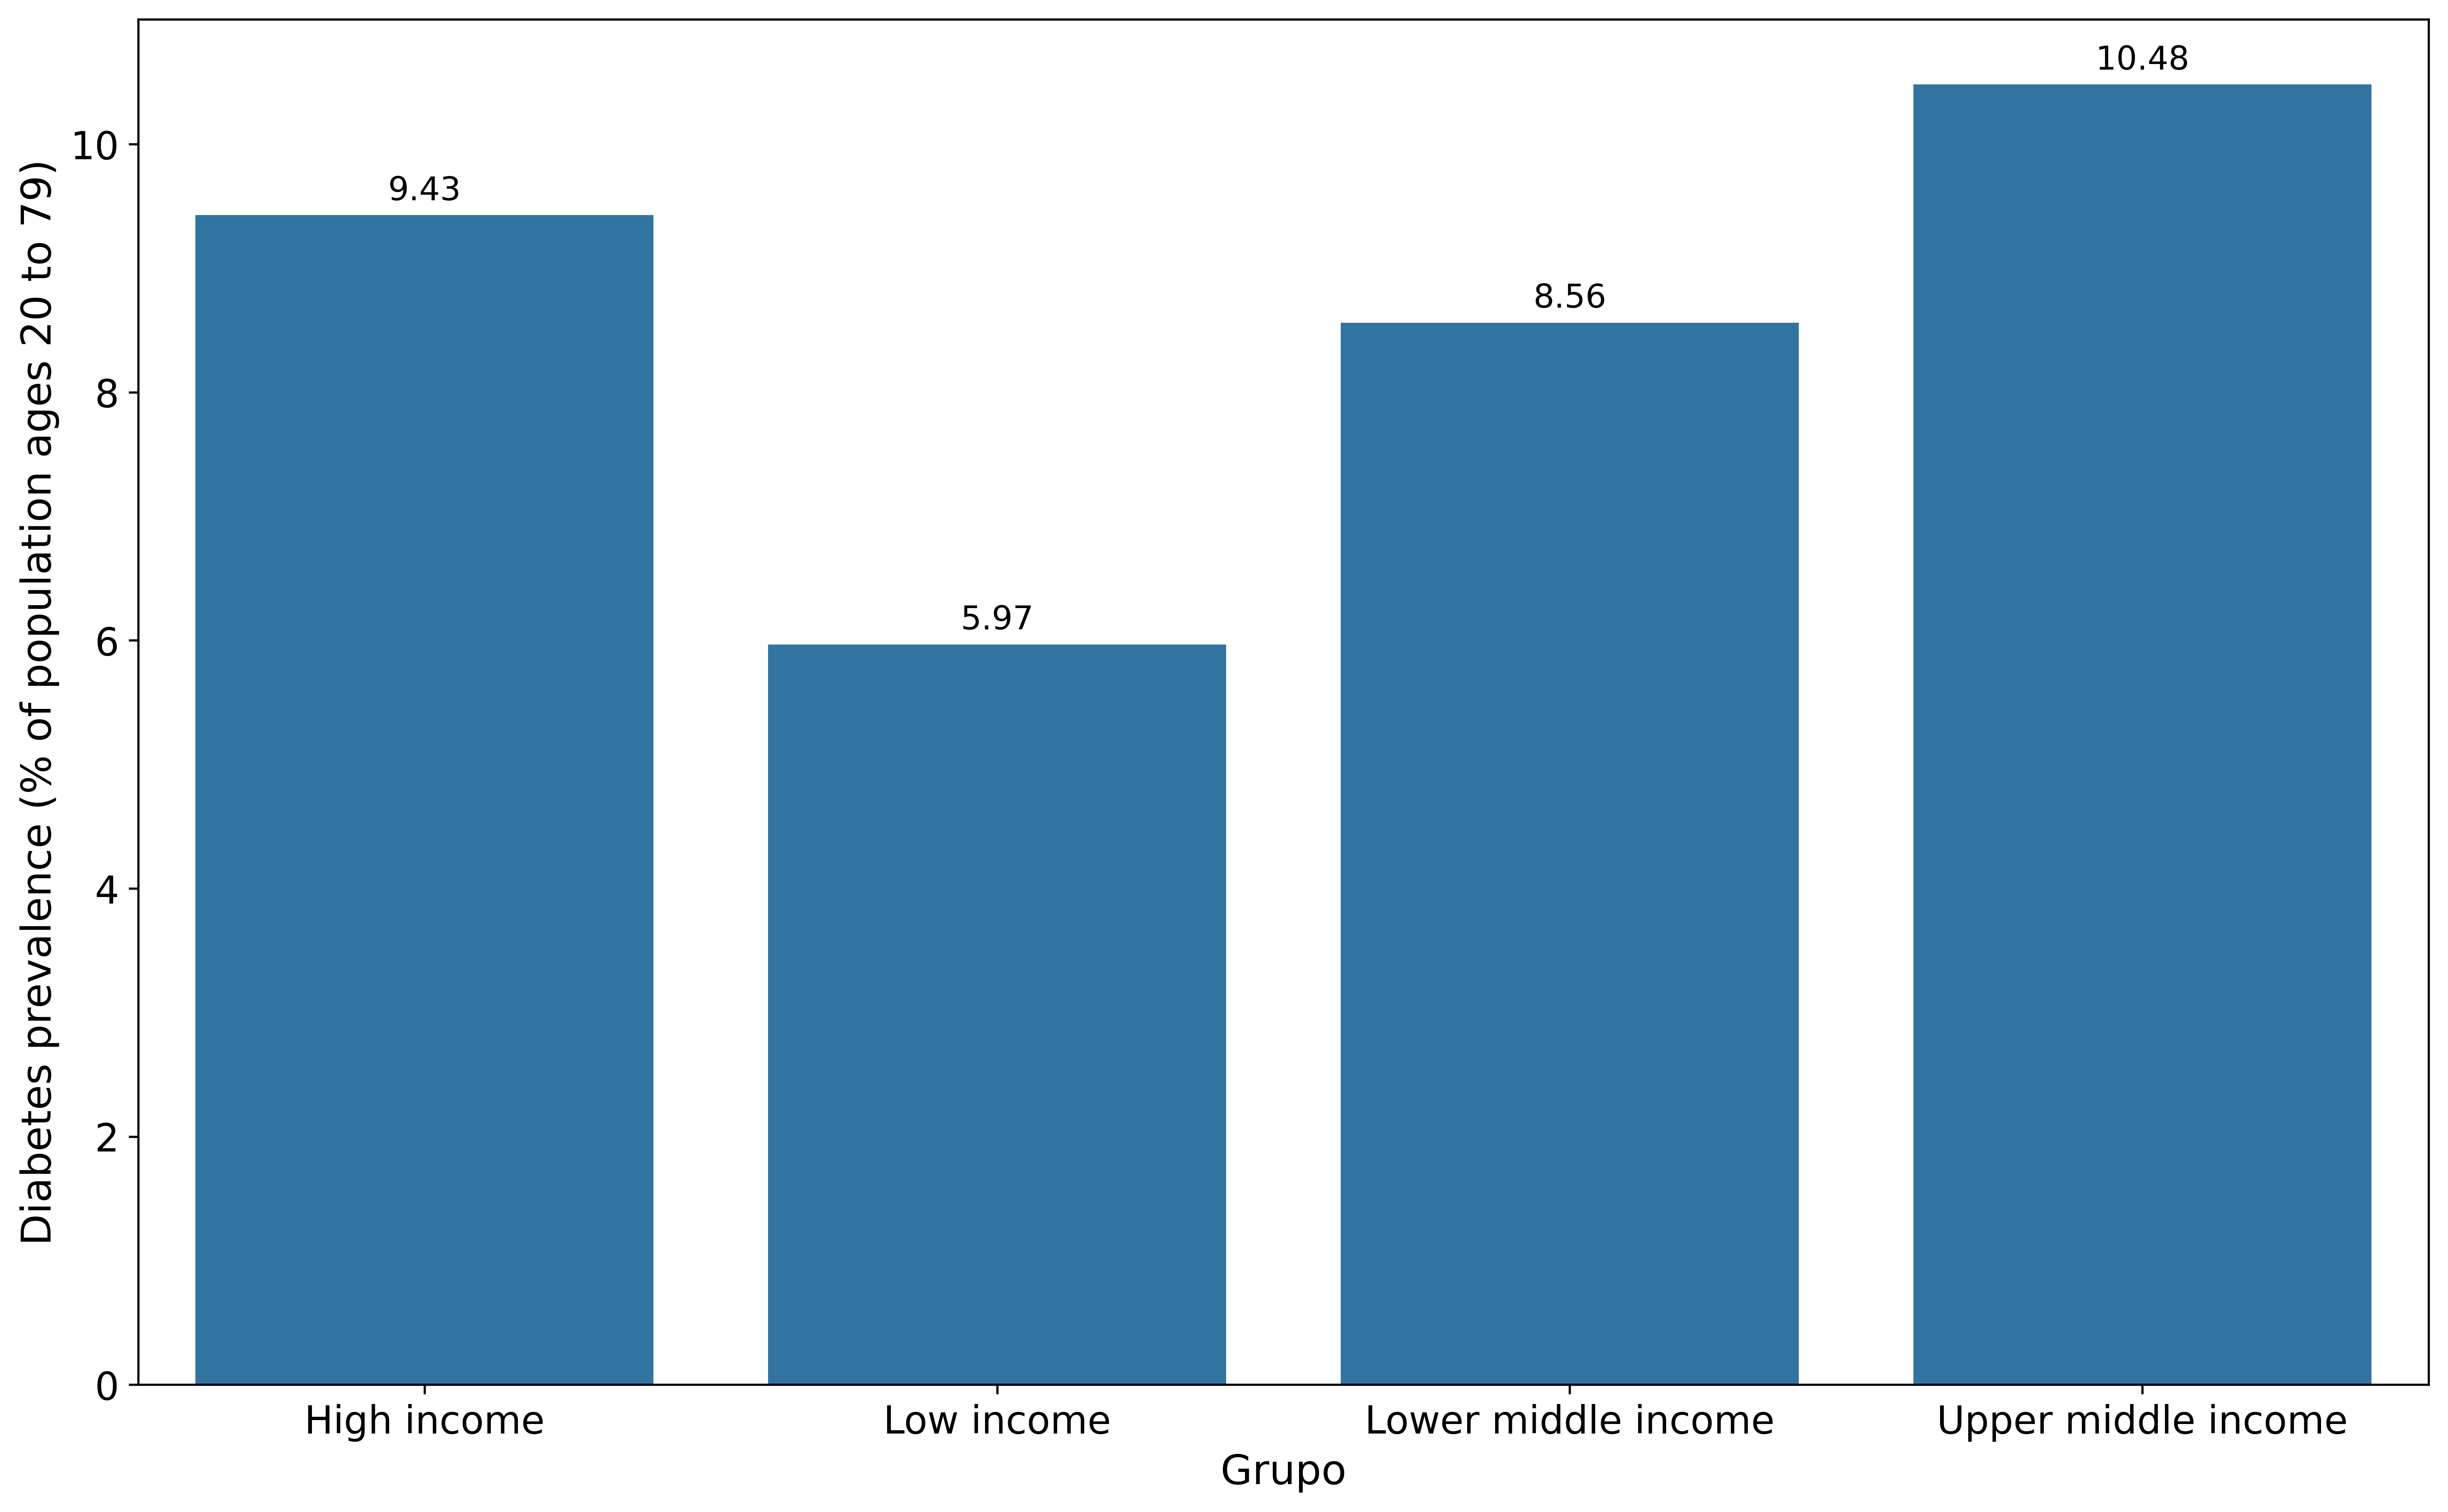

In [29]:
plt.figure(figsize=(15,9), dpi = 600)
ax = sns.barplot(data=estat_grupo, x=estat_grupo.iloc[:,0], y=estat_grupo.iloc[:,1])
for container in ax.containers: ax.bar_label(container, fmt='%.2f', padding=3, fontsize=12)
plt.xlabel('Grupo',fontsize=15)
plt.ylabel('Diabetes prevalence (% of population ages 20 to 79)', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()